# **Segundo Challenge - Telecom X**



##Importar los datos

In [28]:
## Importacion de los datos y Crear DataFrame.

import pandas as pd

df = pd.read_json('/content/TelecomX_Data.json')
df.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [29]:
# conocimiendo la DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [30]:
## Vamos a normalizar los datos.
df_flat = pd.json_normalize(df.to_dict(orient='records'))
df_flat.tail()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.6


In [31]:
# Ver las primeras 5 filas
print("Primeras 5 filas del dataset:")
display(df_flat.head())

# Ver nombres de columnas y tipos de datos
print("\nInformación de columnas y tipos de datos:")
df_flat.info()

Primeras 5 filas del dataset:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



Información de columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  inter

In [32]:
# Identificar las columnas claves

# Variables relevantes para churn
columnas_clave = [
    'Churn',
    'customer.tenure',
    'customer.SeniorCitizen',
    'account.Contract',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.TechSupport',
    'phone.MultipleLines'
]

# Mostrar valores únicos por columna para entenderlas mejor
for col in columnas_clave:
    print(f"\n{col} → valores únicos:")
    print(df_flat[col].unique())



Churn → valores únicos:
['No' 'Yes' '']

customer.tenure → valores únicos:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

customer.SeniorCitizen → valores únicos:
[0 1]

account.Contract → valores únicos:
['One year' 'Month-to-month' 'Two year']

account.PaymentMethod → valores únicos:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

account.Charges.Monthly → valores únicos:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]

account.Charges.Total → valores únicos:
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']

internet.InternetService → valores únicos:
['DSL' 'Fiber optic' 'No']

internet.OnlineSecurity → valores únicos:
['No' 'Yes' 'No internet service']

internet.TechSupport → valores únicos:
['Yes' 'No' 'No internet service']

phone.MultipleLines → valores únic

In [33]:
# PASO 4: Verificación de calidad de los datos

# Lista de columnas importantes
columnas_minimas = [
    'Churn',
    'customer.gender',
    'customer.tenure',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'internet.InternetService',
    'account.Contract',
    'account.PaymentMethod',
    'account.Charges.Monthly'
]

# Crear nuevo DataFrame solo con esas columnas
df_clave = df_flat[columnas_minimas]


In [34]:
import numpy as np

In [35]:
# 2. Verificar valores nulos (faltantes)

# Conteo de valores nulos por columna
df_clave.isnull().sum()

,0
Churn,0
customer.gender,0
customer.tenure,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
phone.PhoneService,0
internet.InternetService,0
account.Contract,0
account.PaymentMethod,0


In [36]:
# 3. Verificar duplicados

# Revisar si hay filas repetidas
df_clave.duplicated().sum()

np.int64(48)

In [37]:
# si el numero fue mayor de 0 usar el siguiente codigo:

df_clave = df_clave.drop_duplicates()


In [38]:
#Verificar valores únicos en cada columna categórica

# Revisar valores únicos por columna
for col in df_clave.columns:
    print(f"\n{col} → valores únicos:")
    print(df_clave[col].unique())



Churn → valores únicos:
['No' 'Yes' '']

customer.gender → valores únicos:
['Female' 'Male']

customer.tenure → valores únicos:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

customer.SeniorCitizen → valores únicos:
[0 1]

customer.Partner → valores únicos:
['Yes' 'No']

customer.Dependents → valores únicos:
['Yes' 'No']

phone.PhoneService → valores únicos:
['Yes' 'No']

internet.InternetService → valores únicos:
['DSL' 'Fiber optic' 'No']

account.Contract → valores únicos:
['One year' 'Month-to-month' 'Two year']

account.PaymentMethod → valores únicos:
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

account.Charges.Monthly → valores únicos:
[65.6  59.9  73.9  ... 91.75 68.8  67.85]


In [39]:
#Verificar formato de numéricos

# Revisar tipo y resumen de estadística
df_clave['account.Charges.Monthly'] = pd.to_numeric(df_clave['account.Charges.Monthly'], errors='coerce')
df_clave['account.Charges.Monthly'].describe()


,account.Charges.Monthly
count,7219.000000
mean,64.920792
std,30.064568
min,18.250000
25%,35.775000
50%,70.400000
75%,89.950000
max,118.750000


In [40]:
# Reemplazar espacios vacíos por NaN y eliminarlos
df_clave['Churn'] = df_clave['Churn'].replace('', pd.NA)
df_clave = df_clave.dropna(subset=['Churn'])

In [41]:
# ¿Hay filas duplicadas?
print("Duplicados encontrados:", df_clave.duplicated().sum())

# Eliminar duplicados si existen
df_clave = df_clave.drop_duplicates()


Duplicados encontrados: 0


### Creación de columna "Cuentas_diarias"

In [42]:
# Crear la columna con el valor diario aproximado
df_clave['Cuentas_Diarias'] = df_clave['account.Charges.Monthly'] / 30

# Mostrar las primeras filas para verificar
df_clave[['account.Charges.Monthly', 'Cuentas_Diarias']].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### Parte 1: Convertir “Yes”/“No” en 1 y 0 (binarios)

In [43]:
# Lista de columnas con valores "Yes"/"No"
binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService'
]

# Convertir "Yes" a 1 y "No" a 0
df_clave[binarias] = df_clave[binarias].replace({'Yes': 1, 'No': 0})


### Parte 2: Renombrar columnas (opcional pero útil)

In [44]:
df_clave = df_clave.rename(columns={
    'Churn': 'Se_Fue',
    'customer.gender': 'Genero',
    'customer.tenure': 'Meses_Cliente',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'phone.PhoneService': 'Servicio_Telefonico',
    'internet.InternetService': 'Tipo_Internet',
    'account.Contract': 'Tipo_Contrato',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Factura_Mensual',
    'Cuentas_Diarias': 'Factura_Diaria'
})


In [45]:
print(df_clave.columns)


Index(['Se_Fue', 'Genero', 'Meses_Cliente', 'Adulto_Mayor', 'Tiene_Pareja',
       'Tiene_Dependientes', 'Servicio_Telefonico', 'Tipo_Internet',
       'Tipo_Contrato', 'Metodo_Pago', 'Factura_Mensual', 'Factura_Diaria'],
      dtype='object')


### Análisis descriptivo con .describe()

In [46]:
# Estadísticas descriptivas de todas las columnas numéricas
df_clave.describe()


,Se_Fue,Meses_Cliente,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Servicio_Telefonico,Factura_Mensual,Factura_Diaria
count,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000,6995.000000
mean,0.264904,32.520801,0.163117,0.485347,0.300929,0.902502,64.969099,2.165637
std,0.441313,24.508768,0.369498,0.499821,0.458695,0.296656,30.022287,1.000743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,36.000000,1.200000
50%,0.000000,29.000000,0.000000,0.000000,0.000000,1.000000,70.450000,2.348333
75%,1.000000,55.500000,0.000000,1.000000,1.000000,1.000000,89.900000,2.996667
max,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.958333


### Visualizar cuántos clientes se quedaron (Se_Fue = 0) y cuántos se dieron de baja (Se_Fue = 1), usando un gráfico claro y fácil de interpretar.

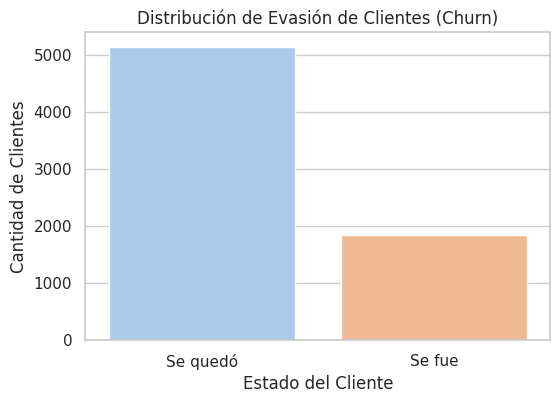

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Gráfico de conteo
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Se_Fue', hue='Se_Fue', data=df_clave, palette='pastel', legend=False)


# Etiquetas y título
ax.set_xticklabels(['Se quedó', 'Se fue'])
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.show()


### Recuento de evasión por variables categóricas

In [48]:
import pandas as pd

# Ejemplo: tabla cruzada de género vs evasión
tabla_genero = pd.crosstab(df_clave['Genero'], df_clave['Se_Fue'], normalize='index')
print(tabla_genero)


## reuerda que el resultado no dara numero enteros por el analisis descriptivo binario que ya habias hecho.

Se_Fue         0         1
Genero                    
Female  0.731279  0.268721
Male    0.738859  0.261141


In [49]:
# Ejemplo: tabla cruzada de Tipo de contrato vs evasión
tabla_contrato = pd.crosstab(df_clave['Tipo_Contrato'], df_clave['Se_Fue'], normalize='index')
print(tabla_contrato)

Se_Fue                 0         1
Tipo_Contrato                     
Month-to-month  0.572509  0.427491
One year        0.887228  0.112772
Two year        0.971581  0.028419


In [50]:
# Ejemplo: tabla cruzada de 'Metodo_Pago' vs evasión
tabla_metodo_pago = pd.crosstab(df_clave['Metodo_Pago'], df_clave['Se_Fue'], normalize='index')
print(tabla_metodo_pago)

Se_Fue                            0         1
Metodo_Pago                                  
Bank transfer (automatic)  0.832576  0.167424
Credit card (automatic)    0.847067  0.152933
Electronic check           0.548538  0.451462
Mailed check               0.811153  0.188847


### Estadísticas descriptivas por grupo

In [51]:
# Estadísticas generales para total gastado y tiempo de contrato, según evasión
df_clave.groupby('Se_Fue')[['Meses_Cliente', 'Factura_Mensual', 'Factura_Diaria']].describe()


Meses_Cliente                                                     \
               count       mean        std  min   25%   50%   75%   max   
Se_Fue                                                                    
0             5142.0  37.708285  24.039148  0.0  15.0  38.0  61.0  72.0   
1             1853.0  18.125742  19.551169  1.0   2.0  10.0  29.0  72.0   

       Factura_Mensual             ...                  Factura_Diaria  \
                 count       mean  ...      75%     max          count   
Se_Fue                             ...                                   
0               5142.0  61.459335  ...  88.5875  118.75         5142.0   
1               1853.0  74.708554  ...  94.2500  118.35         1853.0   

                                                                              
            mean       std       min       25%       50%       75%       max  
Se_Fue                                                                        
0       2.048644  1.034505  0.608333  0.838333  2.155000  2.952917  3.958333  
1       2.490285  0.817206  0.628333  1.905000  2.656667  3.141667  3.945000  

[2 rows x 24 columns]

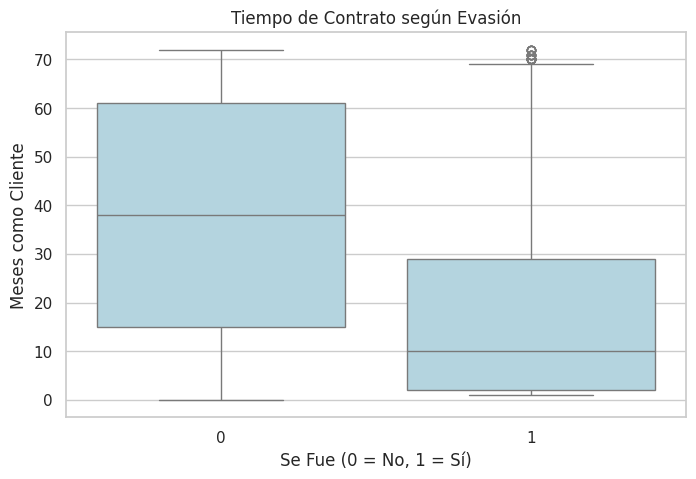

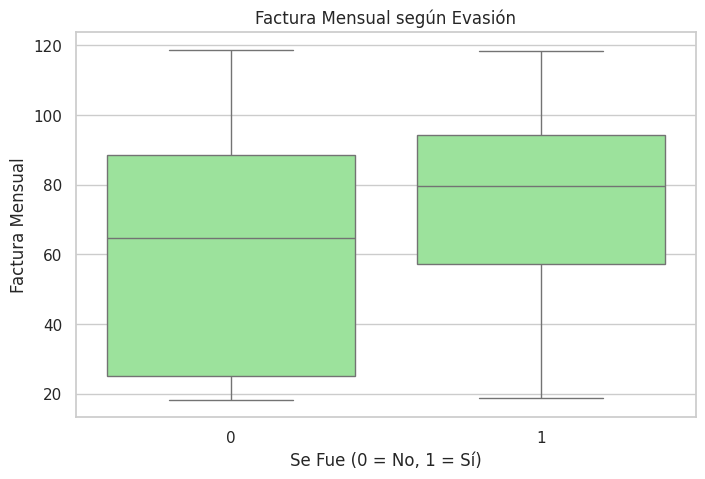

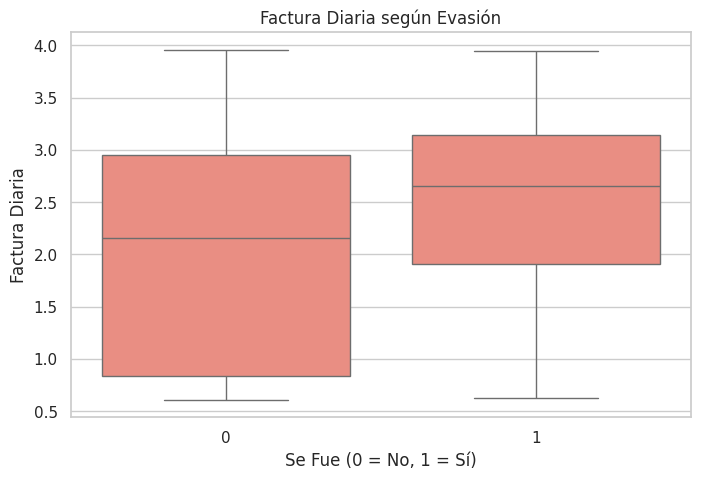

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Meses como cliente
plt.figure(figsize=(8,5))
sns.boxplot(x='Se_Fue', y='Meses_Cliente', data=df_clave, color='lightblue')
plt.title('Tiempo de Contrato según Evasión')
plt.xlabel('Se Fue (0 = No, 1 = Sí)')
plt.ylabel('Meses como Cliente')
plt.show()

# Boxplot: Factura mensual
plt.figure(figsize=(8,5))
sns.boxplot(x='Se_Fue', y='Factura_Mensual', data=df_clave, color='lightgreen')
plt.title('Factura Mensual según Evasión')
plt.xlabel('Se Fue (0 = No, 1 = Sí)')
plt.ylabel('Factura Mensual')
plt.show()

# Boxplot: Factura diaria
plt.figure(figsize=(8,5))
sns.boxplot(x='Se_Fue', y='Factura_Diaria', data=df_clave, color='salmon')
plt.title('Factura Diaria según Evasión')
plt.xlabel('Se Fue (0 = No, 1 = Sí)')
plt.ylabel('Factura Diaria')
plt.show()



# **INFORME FINAL**

## **🔹 Introducción**

El presente análisis tiene como objetivo principal comprender los factores asociados a la evasión de clientes ```(Churn)``` en la empresa Telecom X, utilizando un conjunto de datos que contiene información detallada sobre los clientes, sus contratos, servicios y comportamiento de pago. La evasión de clientes es un problema crítico en industrias de suscripción, ya que retener clientes existentes suele ser más rentable que adquirir nuevos. Identificar patrones que predicen la deserción permite tomar decisiones estratégicas más informadas y efectivas.

## **🔹 Limpieza y Tratamiento de Datos**

Se realizaron los siguientes pasos:

✅ Se importaron los datos desde un archivo .json.

✅ Se renombraron las columnas para hacerlas más legibles (por ejemplo, customer.tenure a Meses_Cliente, account.Charges.Monthly a Factura_Mensual, etc.).

✅ Se verificaron valores nulos y se limpiaron los registros necesarios.

✅ Se creó una nueva variable: Factura_Diaria, para entender mejor la facturación proporcional.

✅ Se estandarizó la columna Churn renombrándola como Se_Fue (0 = se quedó, 1 = se fue).



## **🔹 Análisis Exploratorio de Datos (EDA)**

📊 **1. Variables Categóricas**
Se analizaron las variables como género, tipo de contrato y método de pago en relación con la evasión:

**Género:** Tanto hombres como mujeres mostraron porcentajes similares de evasión (~26%-27%).

**Tipo de contrato:**

Clientes con contrato mes a mes presentan una mayor tasa de evasión.

Contratos de largo plazo (1 o 2 años) están asociados con mayor retención.

**Método de pago:**

Métodos electrónicos automáticos mostraron tasas ligeramente menores de evasión.

**Visualizaciones:**

Gráficos de barras agrupadas (countplot) para comparar las proporciones.


📈 **2. Variables Numéricas**
Se evaluó cómo se distribuyen Meses_Cliente, Factura_Mensual y Factura_Diaria según el estado del cliente:

**Meses como cliente:** Los clientes que se fueron tienden a haber estado menos tiempo.

**Factura mensual:** La distribución es más dispersa en clientes que se fueron.

**Factura diaria:** Comportamiento similar, aunque más concentrado.

**Visualizaciones:**

Diagramas de caja (boxplot) sin warnings.

Curvas de distribución KDE para comparar visualmente ambos grupos (Se_Fue).

## **🔹 Conclusiones e Insights**

✅ **La evasión está asociada principalmente a:**

Contratos cortos (mes a mes).

Clientes con poco tiempo con la empresa.

Posiblemente, facturación elevada en relación con el tipo de servicio.

✅**Variables como género o tener pareja no mostraron una diferencia significativa.**

✅ **Clientes con contratos anuales o bianuales y métodos de pago automáticos tienden a permanecer más tiempo.**

##**🔹 Recomendaciones Estratégicas**

1. Fomentar contratos a largo plazo, ofreciendo descuentos o beneficios para clientes que cambien de contrato mensual a anual o bianual.

2. Incentivar pagos automáticos, con beneficios como descuentos en la factura o puntos de fidelidad.

3. Implementar alertas tempranas para clientes con poco tiempo de servicio y facturas elevadas, ya que son más propensos a irse.

4. Mejorar la experiencia en los primeros meses, ya que muchos clientes que se van no superan cierto tiempo de permanencia.

5. Diseñar campañas personalizadas para clientes con perfiles de riesgo, basadas en los patrones observados en este análisis.
